<h1><center>MLab - Computational Physics</center></h1>
<h2><center>Tensor Networks</center></h2>

In [2]:
using Plots
using LaTeXStrings
using ITensors
using ITensors.HDF5
using FiniteSizeScaling
using Statistics
using CurveFit
using JLD2

## Task 3.1

In [13]:
S_arr = load_object("EntanglementEntropies.jld2")
S_bi = load_object("EntanglementSpectrum.jld2");

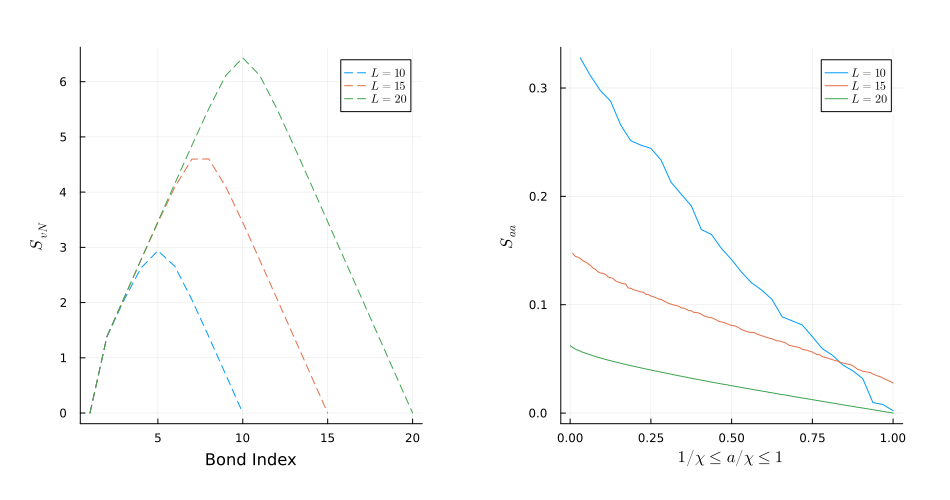

In [24]:
Bonds = [collect(1:length(S_arr[i])) for i in 1:3]
a = [collect(1:length(S_bi[i]))/length(S_bi[i]) for i in 1:3]
labels = [L"$L = 10$" L"$L = 15$" L"$L = 20$"]

p1 = plot(Bonds, S_arr, xlabel = "Bond Index", linestyle=:dash,
    label = labels, ylabel = L"$S_{vN}$", margin = 10*Plots.mm)

p2 = plot(a, S_bi, xlabel = L"$1/\chi \leq a/\chi \leq 1$", 
    label = labels, ylabel = L"$S_{aa}$", margin = 10*Plots.mm)

plot(p1, p2, size = (950,500))

In [25]:
savefig("Entropies")

"D:\\M.Sc. Courses\\3. SoSe 2022\\4. Data Analysis in Physics and Astronomy\\Exercises\\Tensor Nets\\Entropies.png"

We plot the von-Neumann entropy $S_{\nu N}$ against the bond index (left) for every partition staring from the first bond till the 19th for a random MPS of 20 spin 1/2 (increasing partition size). As we expect, the entanglement entropy is maximised around the center of the chain. On the right we plot the entanglement spectrum (singular values) with respect to the bond dimension and we can see a slow sublinear decrease.

## Task 3.2

In [26]:
g = collect(0.0:0.01:1.0)
M² = load_object("LongRangeOrder.jld2");

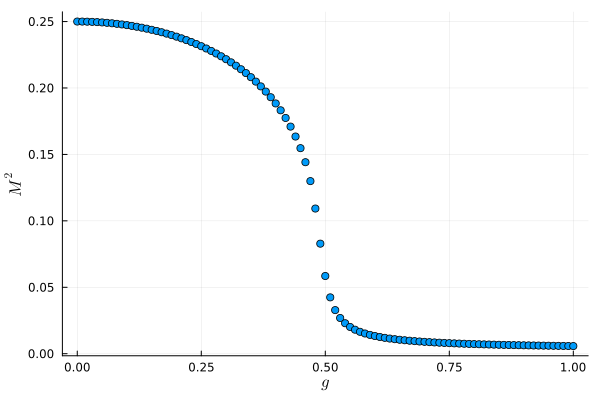

In [27]:
plot(g, M², seriestype=:scatter, xlabel = L"g",ylabel = L"$M^2$", legend = false)

In [84]:
savefig("Long-range-order")

"D:\\M.Sc. Courses\\3. SoSe 2022\\4. Data Analysis in Physics and Astronomy\\Exercises\\Tensor Nets\\Long-range-order.png"

The squared magnetization $\langle M \rangle^2$ starts in a ferromagnetic long ranged ordered phase and decreases monotonically for increasing transverse field $g$ until it reaches zero in an unordered phase after $g_c \approx 0.5$ as can be seen from the plot above (ignoring the outliers).

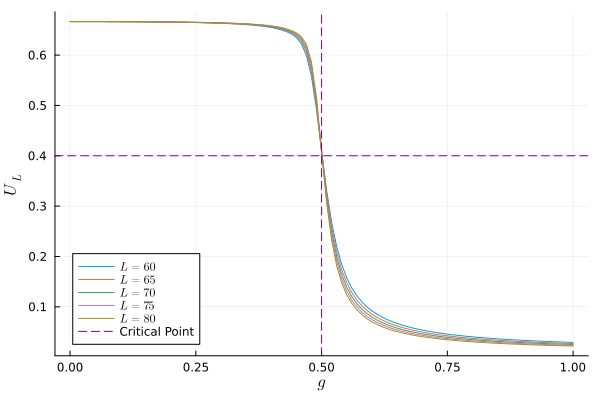

In [28]:
BC = load_object("BinderCumulants.jld2")
plot(g, BC, xlabel = L"$g$", ylabel = L"$U_L$", legend=:bottomleft,
    label = [L"$L = 60$" L"$L = 65$" L"$L = 70$" L"$L = 75$" L"$L = 80$"])
vline!([0.5], label = "Critical Point", linestyle =:dash, colour =:purple)
hline!([0.4], label = "", linestyle =:dash, colour =:purple)

In [87]:
savefig("Binder-Cumulant")

"D:\\M.Sc. Courses\\3. SoSe 2022\\4. Data Analysis in Physics and Astronomy\\Exercises\\Tensor Nets\\Binder-Cumulant.png"

We can read off the critical point $g_c \approx 0.5$ from the above plot of the Binder cumulant vs coupling strength.

In [40]:
g_c = 0.5
ν = load_object("ν.jld2")
println("The critical exponent after scaling collapse was found to be = ", round(ν, digits = 2))

The critical exponent after scaling collapse was found to be = 1.05


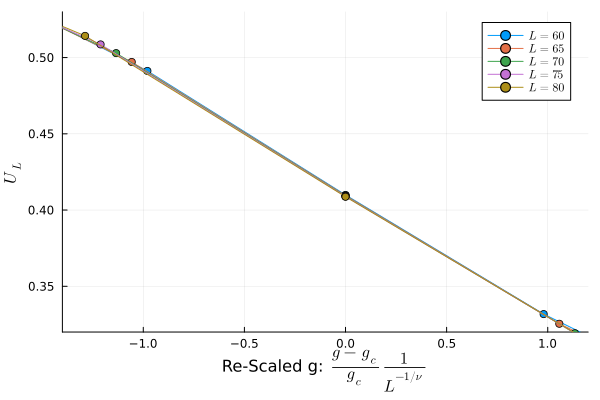

In [77]:
L = [60:5:80;]
x_scaled(X, L, v1, v2) = ((X.-g_c)./g_c)*L^(1/ν)
y_scaled(Y, L, v1, v2) = Y
plot(x_scaled(g, L[1], g_c, ν) , y_scaled(BC[:,1], L[1], g_c, ν), 
    marker=:circle, label = L"$L = %$(L[1])$")
for i in 2:length(L)
    plot!(x_scaled(g, L[i], g_c, ν) , y_scaled(BC[:,i], L[i], g_c, ν), 
        marker=:circle, label = L"$L = %$(L[i])$")
end
ylabel!(L"$U_L$")
xlabel!(L"Re-Scaled g: $\frac{g-g_c}{g_c}\frac{1}{L^{-1/\nu}}$", bottom_margin=3*Plots.mm )
ylims!(0.32,0.53)
xlims!(-1.4,1.2)

In [79]:
savefig("BC-Rescaled")

"D:\\M.Sc. Courses\\3. SoSe 2022\\4. Data Analysis in Physics and Astronomy\\Exercises\\Tensor Nets\\BC-Rescaled.png"

This is close to the theoretical expectation of $\nu = 1$.

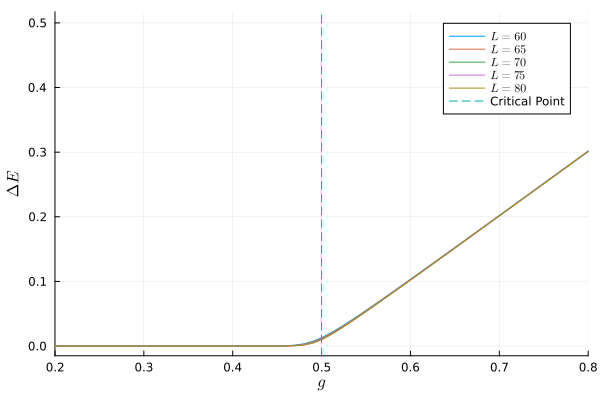

In [96]:
ΔE = load_object("EnergyGaps.jld2")
g = [0.2:0.05:0.4; 0.41:0.01:0.6; 0.65:0.05:1]
plot(g, ΔE, xlabel = L"$g$", ylabel = L"$\Delta E$", xlim = (0.2, 0.8),
    label = [L"$L = 60$" L"$L = 65$" L"$L = 70$" L"$L = 75$" L"$L = 80$"])
vline!([0.5], label = "Critical Point", linestyle =:dash)

In [97]:
savefig("Energy-Gaps")

"D:\\M.Sc. Courses\\3. SoSe 2022\\4. Data Analysis in Physics and Astronomy\\Exercises\\Tensor Nets\\Energy-Gaps.png"

Clearly, the energy gap $\Delta E$ vanishes at the critical point, i.e, $\Delta E(g = 0.5) = 0$.

In [5]:
z = load_object("z")
println("The dynamical critical exponent after scaling collapse was found to be = ", round(z, digits = 2))

The dynamical critical exponent after scaling collapse was found to be = 0.99


In [44]:
sizes = [61:80;]
S = load_object("Entropy_TFIM.jld2")
b, a = linear_fit(log.(sizes), S);

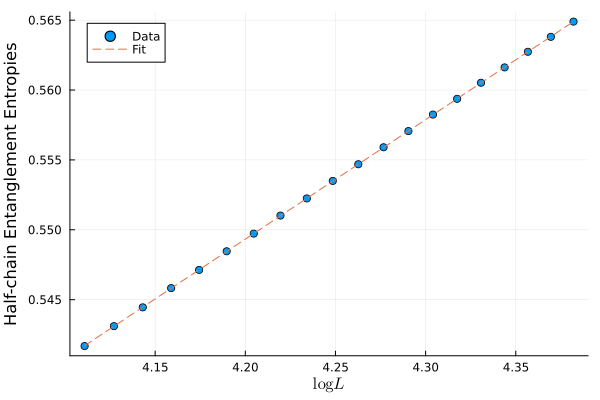

In [43]:
p = scatter(log.(sizes), S, xlabel = L"\log{L}", label = "Data",
    ylabel = "Half-chain Entanglement Entropies")
plot!(log.(sizes), a*log.(sizes) .+ b, linestyle =:dash, label = "Fit")

In [85]:
savefig("Cental-Charge")

"D:\\M.Sc. Courses\\3. SoSe 2022\\4. Data Analysis in Physics and Astronomy\\Exercises\\Tensor Nets\\Cental-Charge.png"

## Task 3.3

In [9]:
f = h5open("AKLT_ground.h5","r")
ψ = read(f,"psi",MPS)
close(f)

In [10]:
println(ψ)

MPS
[1] ((dim=2|id=447|"Link,l=1"), (dim=3|id=189|"S=1,Site,n=1"))
[2] ((dim=2|id=118|"Link,l=2"), (dim=3|id=927|"S=1,Site,n=2"), (dim=2|id=447|"Link,l=1"))
[3] ((dim=3|id=618|"S=1,Site,n=3"), (dim=2|id=144|"Link,l=3"), (dim=2|id=118|"Link,l=2"))
[4] ((dim=3|id=874|"S=1,Site,n=4"), (dim=2|id=943|"Link,l=4"), (dim=2|id=144|"Link,l=3"))
[5] ((dim=3|id=534|"S=1,Site,n=5"), (dim=2|id=980|"Link,l=5"), (dim=2|id=943|"Link,l=4"))
[6] ((dim=3|id=488|"S=1,Site,n=6"), (dim=2|id=869|"Link,l=6"), (dim=2|id=980|"Link,l=5"))
[7] ((dim=3|id=587|"S=1,Site,n=7"), (dim=2|id=222|"Link,l=7"), (dim=2|id=869|"Link,l=6"))
[8] ((dim=3|id=464|"S=1,Site,n=8"), (dim=2|id=655|"Link,l=8"), (dim=2|id=222|"Link,l=7"))
[9] ((dim=3|id=815|"S=1,Site,n=9"), (dim=2|id=686|"Link,l=9"), (dim=2|id=655|"Link,l=8"))
[10] ((dim=3|id=122|"S=1,Site,n=10"), (dim=2|id=248|"Link,l=10"), (dim=2|id=686|"Link,l=9"))
[11] ((dim=3|id=100|"S=1,Site,n=11"), (dim=2|id=55|"Link,l=11"), (dim=2|id=248|"Link,l=10"))
[12] ((dim=3|id=79|"S=1,Sit

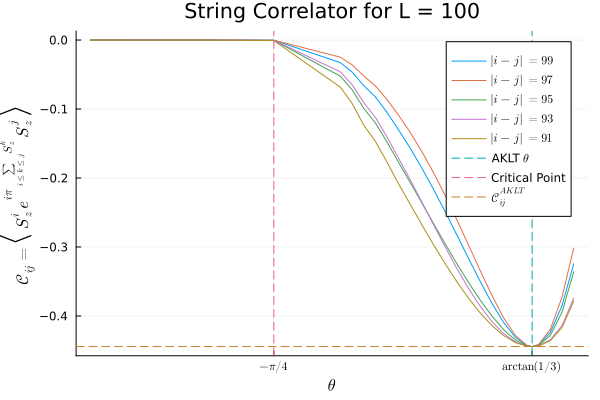

In [2]:
C_ij = load_object("string_correlator.jld2")
θ = load_object("AKLT_params.jld2")
labels = [L"$|i-j| = 99$" L"$|i-j| = 97$" L"$|i-j| = 95$" L"$|i-j| = 93$" L"$|i-j| = 91$"]
plot(θ, C_ij, xlabel = L"$\theta$", title = "String Correlator for L = 100", 
    legend =:best, label = labels, xticks = ([-π/4, atan(1/3)], [L"$-\pi/4$" L"$\arctan{(1/3)}$"]),
ylabel=L"$\mathcal{C}_{ij} = \left\langle S_{z}^{i}e^{i\pi\sum_{i\leq k\leq j}S_{z}^{k}}S_{z}^{j} \right\rangle$")

vline!([atan(1/3)], label = L"AKLT $\theta$", linestyle =:dash)
vline!([-π/4], label = "Critical Point", linestyle =:dash)
hline!([-4/9], label = L"$\mathcal{C}_{ij}^{AKLT}$", linestyle =:dash)

In [3]:
savefig("String-Correlator")

"D:\\M.Sc. Courses\\3. SoSe 2022\\4. Data Analysis in Physics and Astronomy\\Exercises\\Tensor Nets\\String-Correlator.png"

In [15]:
l = collect(2:2:100)
S = load_object("S")
S_AKLT = load_object("S_AKLT");

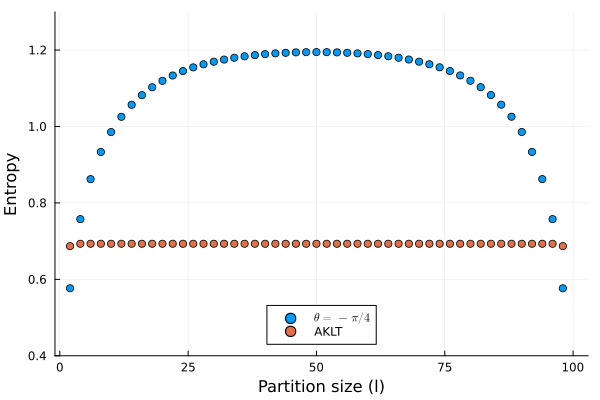

In [16]:
scatter(l, [S, S_AKLT], ylim = (0.4, 1.3), label = [L"$\theta = -\pi/4$" "AKLT"], 
    ylabel = "Entropy", xlabel = "Partition size (l)", legend =:bottom)

In [4]:
savefig("Entropy_BBC")

"D:\\M.Sc. Courses\\3. SoSe 2022\\4. Data Analysis in Physics and Astronomy\\Exercises\\Tensor Nets\\Entropy_BBC.png"

In [17]:
x = log.(sin.(π*(l.-1)/maximum(l)))/6
mid = findfirst(s -> s == maximum(S), S)
x1 = x[begin:mid].+ x[end:-1:mid+1]
S1 = S[begin:mid].+ S[end:-1:mid+1]
b1, a1 = linear_fit(x1/2, S1/2)

(1.2263739266741522, 1.4514804452828707)

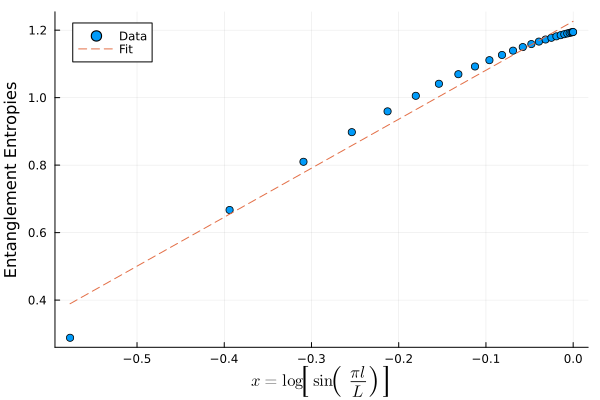

In [20]:
p = scatter(x1/2, S1/2, label = "Data", ylabel = "Entanglement Entropies",
            xlabel = L"x = \log\left[\sin\left(\frac{\pi l}{L}\right)\right]")
plot!(x1/2, a1*x1/2 .+ b1, linestyle =:dash, label = "Fit")

In [22]:
savefig("Entropy_fit_BBC")

"D:\\M.Sc. Courses\\3. SoSe 2022\\4. Data Analysis in Physics and Astronomy\\Exercises\\Tensor Nets\\Entropy_fit_BBC.png"